In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
sns.set_palette("YlOrBr")

In [3]:
df = pd.read_csv("patents_cleaned.csv")
df = df.drop(columns=["Unnamed: 0"])
df.head()

,patent_number,patent_title,patent_kind,patent_type,patent_year,patent_date,patent_abstract,patent_firstnamed_assignee_city,patent_firstnamed_assignee_country,patent_firstnamed_assignee_id,...,patent_firstnamed_inventor_state,patent_num_cited_by_us_patents,patent_num_combined_citations,patent_num_foreign_citations,patent_num_us_application_citations,patent_num_us_patent_citations,patent_num_claims,detail_desc_length,patent_processing_time,patent_average_processing_time
0,10001775,Machine learning systems and techniques to opt...,B2,utility,2018,2018-06-19,"A system, an apparatus or a process may be con...",Foster City,US,4d3af6fb-e1fe-46c9-a659-1f35f0605bfe,...,CA,0,128,8,102,18,21,149708.0,538,871.0
1,10004112,Machine learning apparatus and coil electric h...,B2,utility,2018,2018-06-19,A machine learning apparatus includes a state ...,Yamanashi,JP,7dcb8d36-d147-4198-8843-8346ac374d1d,...,Foreigner,1,15,10,2,3,6,30232.0,628,867.0
2,10013404,Targeted story summarization using natural lan...,B2,utility,2018,2018-07-03,A computer system may receive a textual work. ...,Armonk,US,131272b5-c296-4ef9-b2ae-2e34e9055490,...,MN,2,30,0,18,12,19,62615.0,943,1034.0
3,10015181,Using natural language processing for detectio...,B2,utility,2018,2018-07-03,"Detection of unintended application behaviors,...",Armonk,US,131272b5-c296-4ef9-b2ae-2e34e9055490,...,NY,0,10,0,7,3,14,20517.0,775,988.0
4,10019491,Machine learning of response selection to stru...,B1,utility,2018,2018-07-10,A machine learning of response selection to st...,Austin,US,572b5f95-960b-4fcf-86e2-580c0541439e,...,TX,6,4,0,2,2,30,33379.0,145,894.0


In [4]:
df = df[df['patent_kind'] != 'E1']

In [5]:
numeric_data = df.select_dtypes(include=['int64', 'float64']).copy()
X = numeric_data.drop(columns=["patent_year"])
y = df['patent_kind']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=95, stratify=y_encoded)

train_shape = X_train.shape
test_shape = X_test.shape

train_shape, test_shape

((5496, 13), (1374, 13))

In [6]:
numeric_data.to_csv("4_numeric.csv")

In [13]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6870 entries, 0 to 6869
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patent_year                           6870 non-null   int64  
 1   patent_firstnamed_assignee_latitude   6870 non-null   float64
 2   patent_firstnamed_assignee_longitude  6870 non-null   float64
 3   patent_firstnamed_inventor_latitude   6870 non-null   float64
 4   patent_firstnamed_inventor_longitude  6870 non-null   float64
 5   patent_num_cited_by_us_patents        6870 non-null   int64  
 6   patent_num_combined_citations         6870 non-null   int64  
 7   patent_num_foreign_citations          6870 non-null   int64  
 8   patent_num_us_application_citations   6870 non-null   int64  
 9   patent_num_us_patent_citations        6870 non-null   int64  
 10  patent_num_claims                     6870 non-null   int64  
 11  detail_desc_length    

In [7]:
def evaluate_svm(kernel, C):
    model = SVC(kernel=kernel, C=C, random_state=95)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    
    print(f"Kernel: {kernel}, Cost (C): {C}, Accuracy: {acc:.4f}")
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f"Confusion Matrix - {kernel} Kernel (C={C})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    return acc

In [8]:
kernels = ["linear", "poly", "rbf"]
C_values = [0.1, 1, 10]


Evaluating linear kernel...
Kernel: linear, Cost (C): 0.1, Accuracy: 0.8246


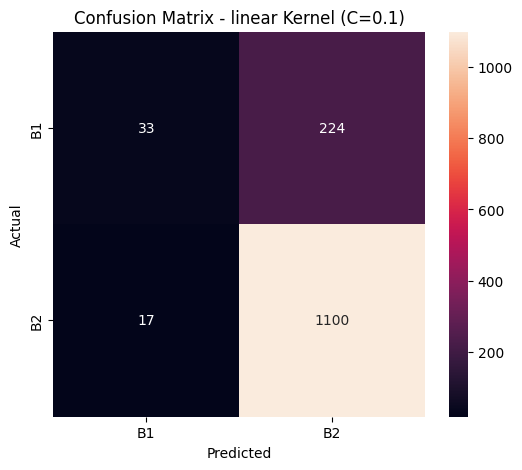

Kernel: linear, Cost (C): 1, Accuracy: 0.8246


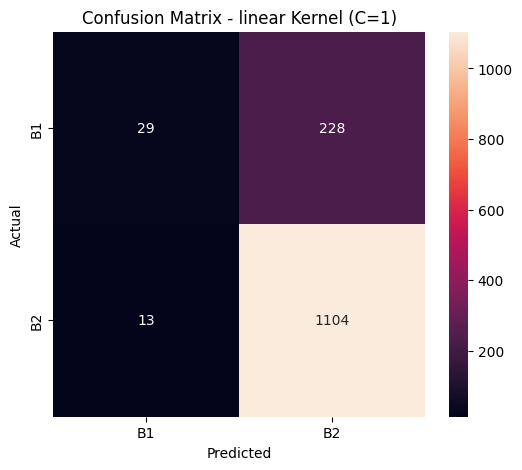

Kernel: linear, Cost (C): 10, Accuracy: 0.8246


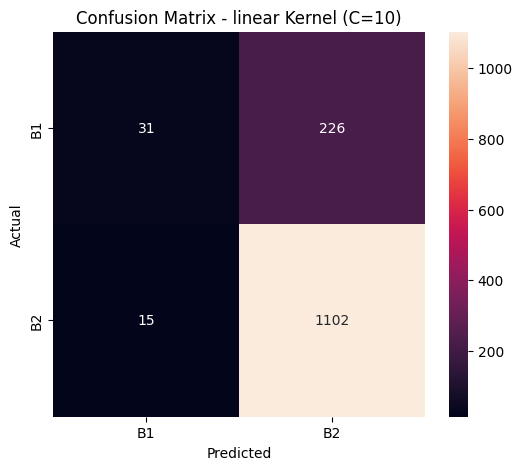


Evaluating poly kernel...
Kernel: poly, Cost (C): 0.1, Accuracy: 0.8130


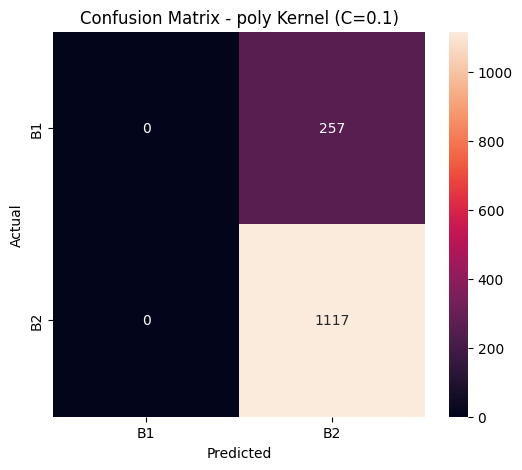

Kernel: poly, Cost (C): 1, Accuracy: 0.8130


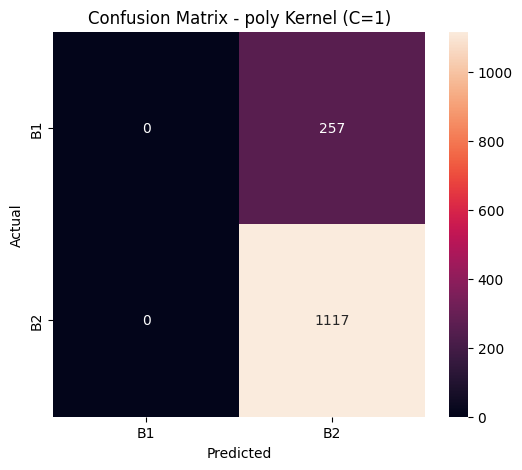

Kernel: poly, Cost (C): 10, Accuracy: 0.8130


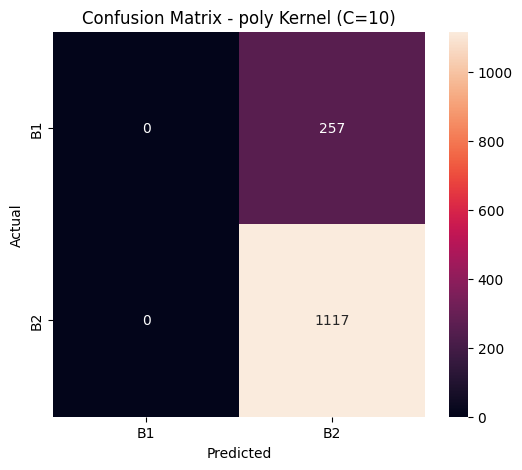


Evaluating rbf kernel...
Kernel: rbf, Cost (C): 0.1, Accuracy: 0.8130


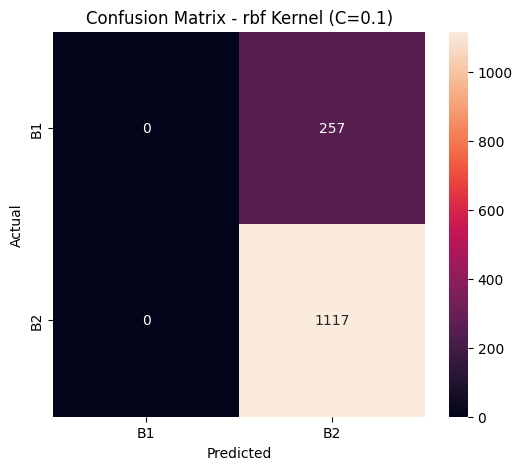

Kernel: rbf, Cost (C): 1, Accuracy: 0.8130


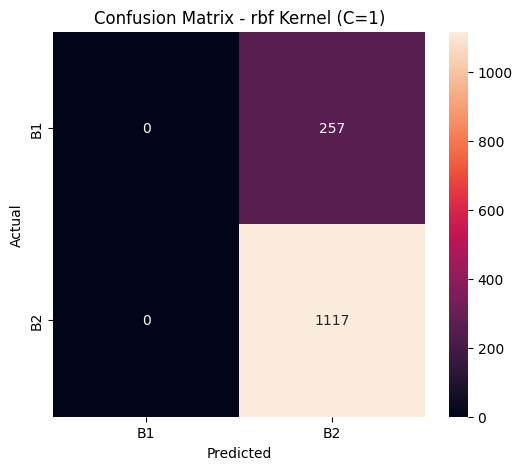

Kernel: rbf, Cost (C): 10, Accuracy: 0.8130


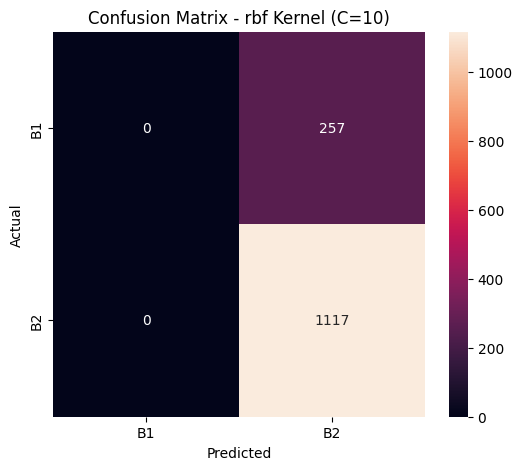

,Kernel and C,Accuracy
0,"(linear, 0.1)",0.824600
1,"(linear, 1)",0.824600
2,"(linear, 10)",0.824600
3,"(poly, 0.1)",0.812955
4,"(poly, 1)",0.812955
5,"(poly, 10)",0.812955
6,"(rbf, 0.1)",0.812955
7,"(rbf, 1)",0.812955
8,"(rbf, 10)",0.812955


In [9]:
results = {}
for kernel in kernels:
    print(f"\nEvaluating {kernel} kernel...")
    for C in C_values:
        acc = evaluate_svm(kernel, C)
        results[(kernel, C)] = acc

results_df = pd.DataFrame(results.items(), columns=['Kernel and C', 'Accuracy']).sort_values(by='Accuracy', ascending=False)
results_df


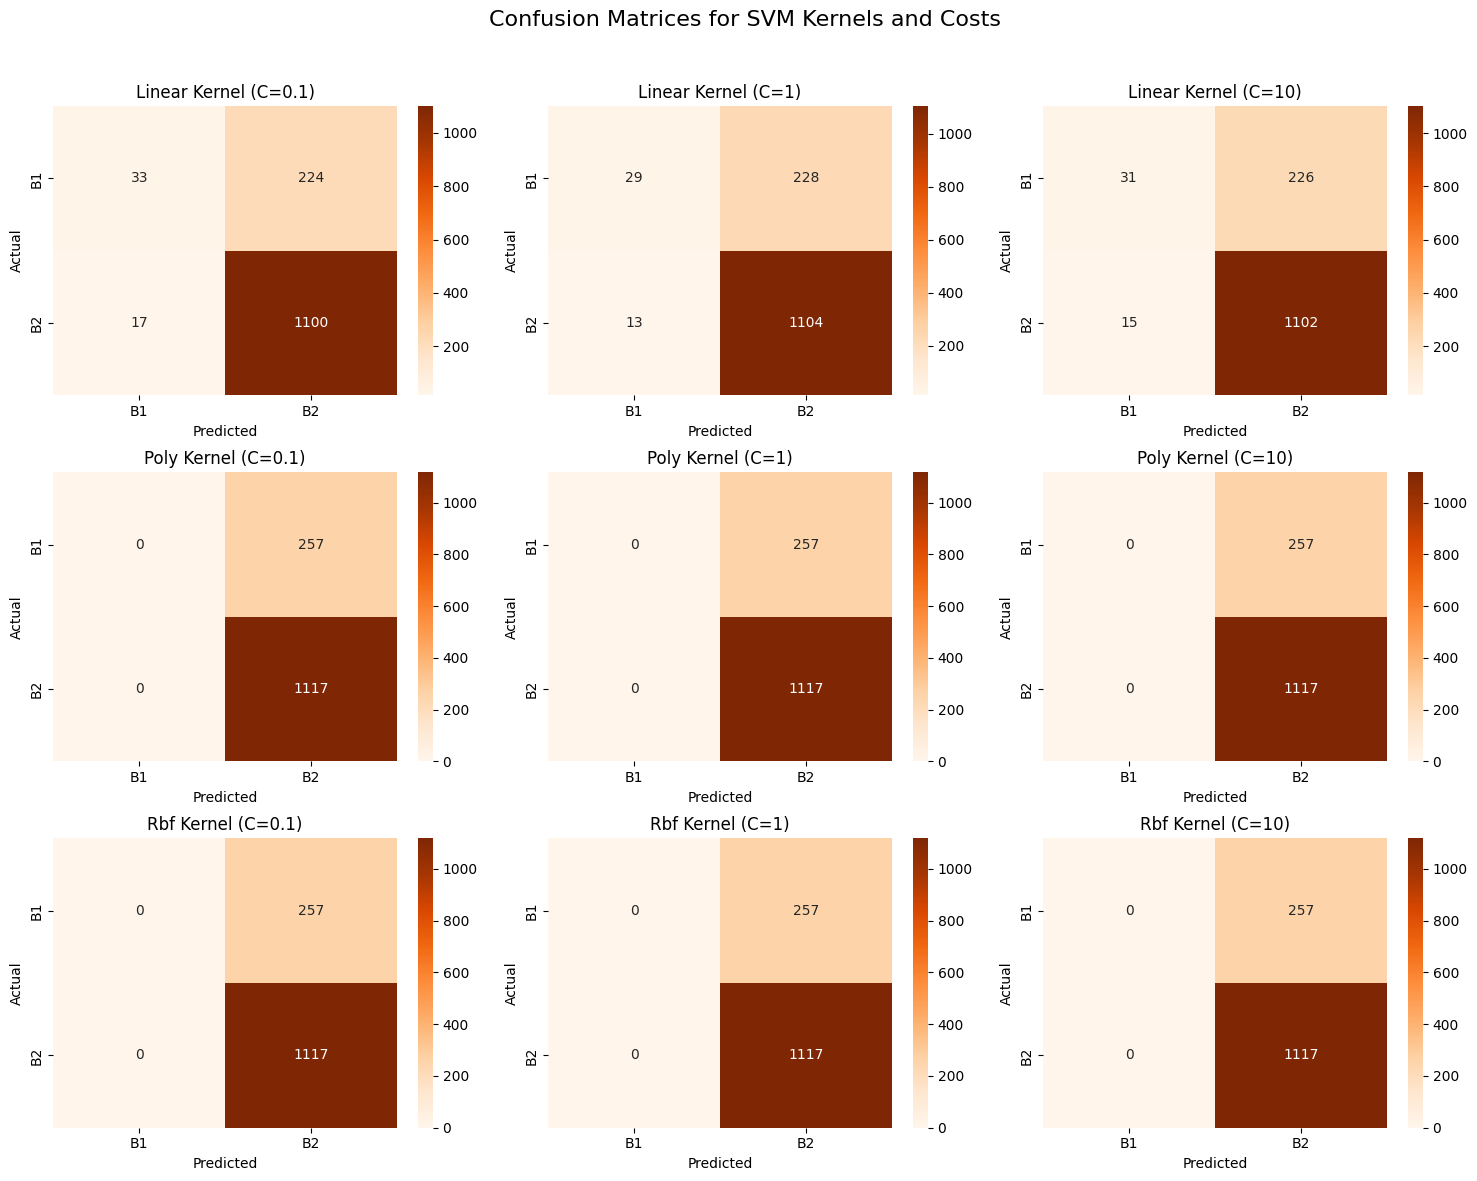

In [10]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle("Confusion Matrices for SVM Kernels and Costs", fontsize=16)

for i, kernel in enumerate(kernels):
    for j, C in enumerate(C_values):
        model = SVC(kernel=kernel, C=C, random_state=95)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        ax = axes[i, j]

        sns.heatmap(cm, annot=True, fmt='d', cmap="Oranges", 
                    xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, ax=ax)
        ax.set_title(f"{kernel.capitalize()} Kernel (C={C})")
        ax.set_xlabel("Predicted")
        ax.set_ylabel("Actual")
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()
